In [2]:
'''
2.)	A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories 
    on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected 
    to report dispatch.Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% 
    significance level.
File: LabTAT.csv
'''

'\n2.)\tA hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories \n    on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected \n    to report dispatch.Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% \n    significance level.\nFile: LabTAT.csv\n'

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, f_oneway

In [4]:
# Load the dataset
df = pd.read_csv("lab_tat_updated.csv")

In [5]:
#Display first 5 line data
df.head()

,Laboratory_1,Laboratory_2,Laboratory_3,Laboratory_4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [6]:
# Step 1: Exploratory Data Analysis (EDA)
print("\nSummary Statistics:",df.describe())


Summary Statistics:        Laboratory_1  Laboratory_2  Laboratory_3  Laboratory_4
count    120.000000    120.000000    120.000000     120.00000
mean     178.257333    178.902917    200.210167     163.68275
std       13.919668     14.957114     15.794801      15.08508
min      140.250000    140.550000    170.580000     124.06000
25%      170.267500    168.025000    190.182500     154.05000
50%      179.055000    178.870000    198.610000     164.42500
75%      187.222500    189.112500    211.197500     172.88250
max      216.390000    217.860000    238.700000     205.18000


In [7]:
# Step 2: Visualize Data Distribution
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Axes: title={'center': 'Histogram of TAT'}, ylabel='Frequency'>

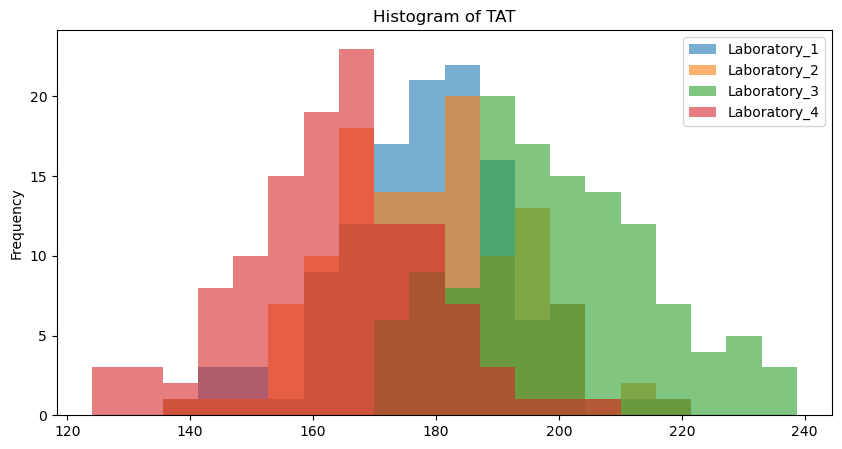

In [8]:
# Histogram for each laboratory
df.plot(kind='hist', alpha=0.6, bins=20, figsize=(10,5), legend=True, title="Histogram of TAT")

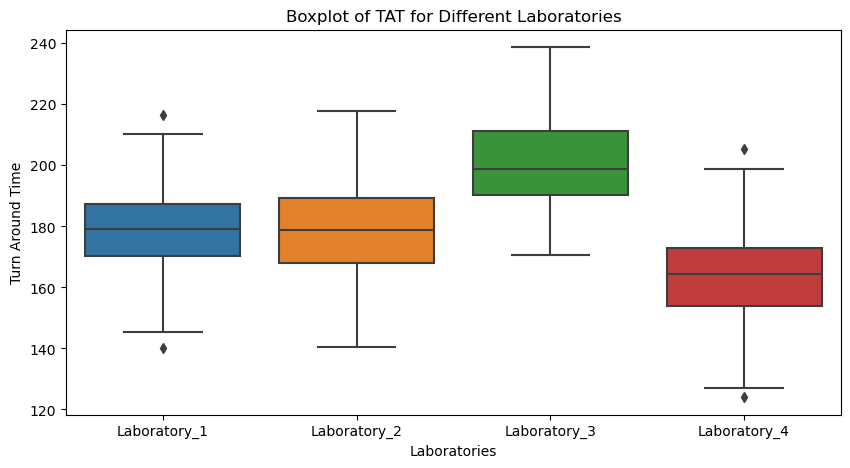

In [9]:
# Boxplot for each laboratory
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.title("Boxplot of TAT for Different Laboratories")
plt.xlabel("Laboratories")
plt.ylabel("Turn Around Time")
plt.show()

In [10]:
# Step 3: Check Normality using Shapiro-Wilk Test
print("\nShapiro-Wilk Test Results:")
for col in df.columns:
    stat, p = shapiro(df[col])
    print(f"{col}: W-statistic = {stat:.4f}, p-value = {p:.4f}")


Shapiro-Wilk Test Results:
Laboratory_1: W-statistic = 0.9887, p-value = 0.4232
Laboratory_2: W-statistic = 0.9936, p-value = 0.8637
Laboratory_3: W-statistic = 0.9796, p-value = 0.0655
Laboratory_4: W-statistic = 0.9914, p-value = 0.6620


In [11]:
# Step 4: Check Homogeneity of Variance using Levene’s test
stat_lev, p_lev = levene(df['Laboratory_1'], df['Laboratory_2'], df['Laboratory_3'], df['Laboratory_4'])

In [12]:
print("\nLevene’s Test for Equal Variance:")
print(f"Levene’s Statistic = {stat_lev:.4f}, p-value = {p_lev:.4f}")


Levene’s Test for Equal Variance:
Levene’s Statistic = 1.0253, p-value = 0.3811


In [13]:
if p_lev > 0.05:
    print("Variances are equal. Proceed with One-Way ANOVA.\n")
else:
    print("Variances are not equal. Consider using Kruskal-Wallis test instead.\n")

Variances are equal. Proceed with One-Way ANOVA.



In [14]:
# Step 5: Perform One-Way ANOVA
stat_anova, p_anova = f_oneway(df['Laboratory_1'], df['Laboratory_2'], df['Laboratory_3'], df['Laboratory_4'])
print("\nOne-Way ANOVA Test Results:")
print(f"F-statistic = {stat_anova:.4f}, p-value = {p_anova:.4f}")


One-Way ANOVA Test Results:
F-statistic = 121.3926, p-value = 0.0000


In [15]:
# Step 6: Conclusion
if p_anova < 0.05:
    print("\nConclusion: Reject the null hypothesis (H0).")
    print("There is a significant difference in the mean TAT among the laboratories.\n")
else:
    print("\nConclusion: Fail to reject the null hypothesis (H0).")
    print("There is NO significant difference in the mean TAT among the laboratories.\n")


Conclusion: Reject the null hypothesis (H0).
There is a significant difference in the mean TAT among the laboratories.

